In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

In [2]:
X_train = np.load('/workspaces/Advanced-Data-Analyst-Projects/employee-attrition-prediction/processed/X_train.npy')
X_test = np.load('/workspaces/Advanced-Data-Analyst-Projects/employee-attrition-prediction/processed/X_test.npy')
y_train = np.load('/workspaces/Advanced-Data-Analyst-Projects/employee-attrition-prediction/processed/y_train.npy')
y_test = np.load('/workspaces/Advanced-Data-Analyst-Projects/employee-attrition-prediction/processed/y_test.npy')

In [3]:
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [4]:
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

In [5]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89        24
           1       0.00      0.00      0.00         6

    accuracy                           0.80        30
   macro avg       0.40      0.50      0.44        30
weighted avg       0.64      0.80      0.71        30

Confusion Matrix:
 [[24  0]
 [ 6  0]]
ROC AUC Score: 0.6354166666666666


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


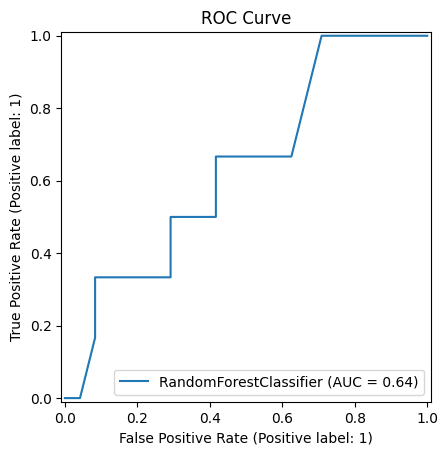

In [6]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)
import matplotlib.pyplot as plt
plt.title('ROC Curve')
plt.show()